In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
# boston.data returns 2D Array of dataset and boston.target returns 1D Array of labels
boston = load_boston()
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
df["PRICE"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA

In [6]:
df.shape

(506, 14)

In [7]:
# There are no NA values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploring each feature

In [9]:
for col in df.columns:
    print(col + " : " + str(df[col].unique()))

CRIM : [6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58400e-02
 4.37900e-02 5.78900e-02 1.35540e-01 1.28160e-01 8.82600e-02 1.58760e-01
 9.16400e-02 1.95390e-01 7.89600e-02 9.51200e-02 1.01530e-01 8.70700e-02
 5.64600e-02 8.38700e-02 4.11300e-02 4.46200

### Missing Values

In [10]:
# There are no NAN Values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### Numerical Variables (Discrete)

In [11]:
# All features are numerical. Lets check how many discrete and continuous features we have
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [14]:
discrete_feature

['CHAS', 'RAD']

In [15]:
df['CHAS'].unique()

array([0., 1.])

In [16]:
df['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

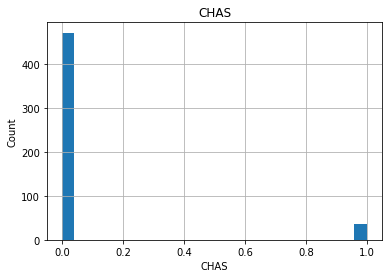

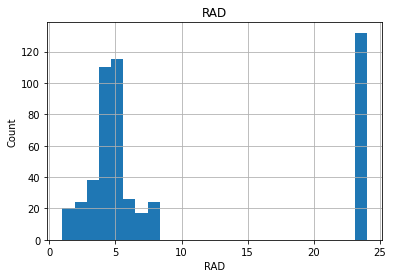

In [17]:
# HISTOGRAM of discrete features

for feature in discrete_feature:
    data=df.copy()  # create a copy to not affect the real dataframe
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**Lets Find the realtionship between discrete features and Price using different plots**

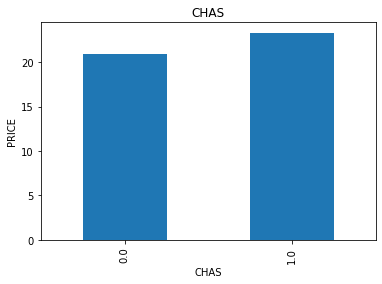

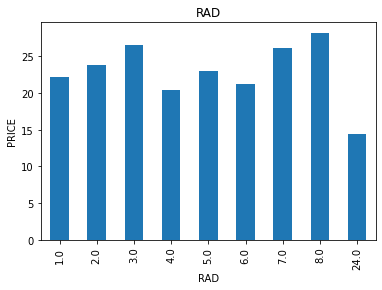

In [18]:
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['PRICE'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('PRICE')
    plt.title(feature)
    plt.show()

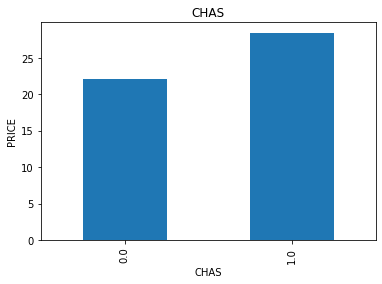

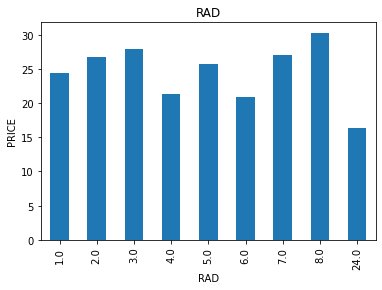

In [19]:
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['PRICE'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('PRICE')
    plt.title(feature)
    plt.show()

In [20]:
df['PRICE'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

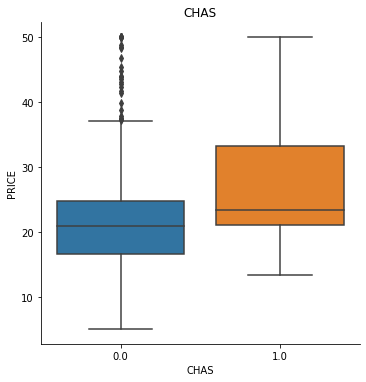

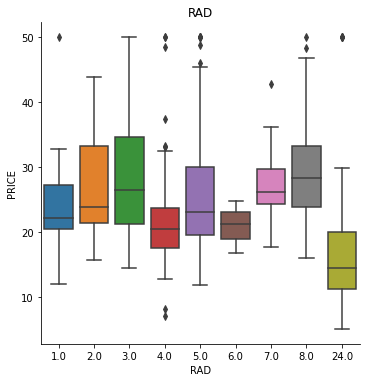

In [21]:
# Boxplot

for feature in discrete_feature:
    data=df.copy()
    sns.catplot(x=feature, y="PRICE", data=df, kind="box")
    plt.title(feature)
    plt.show()

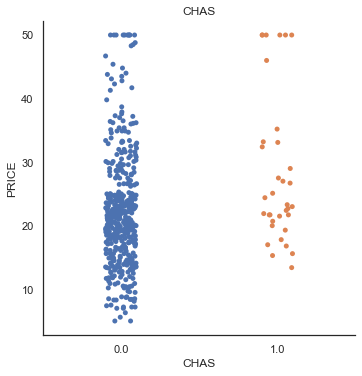

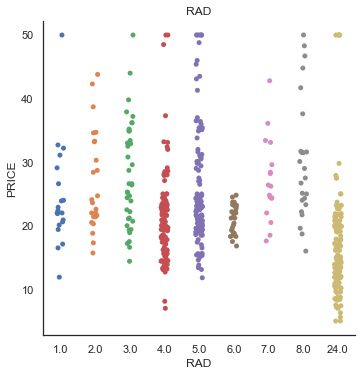

In [22]:
# Catplot
sns.set(style="white")

for feature in discrete_feature:
    data=df.copy()
    sns.catplot(x=feature, y="PRICE", data=df)
    plt.title(feature)
    plt.show()

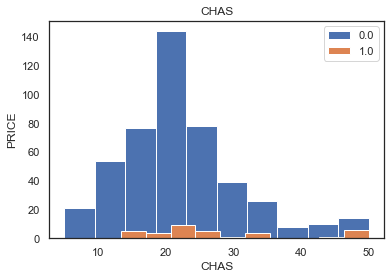

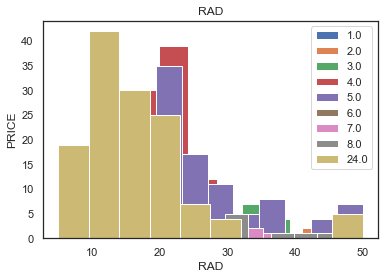

In [23]:
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['PRICE'].plot.hist()
    plt.xlabel(feature)
    plt.ylabel('PRICE')
    plt.title(feature)
    plt.legend()
    plt.show()

* It looks like CHAS and RAD do not give useful information about the target variable

### Continuous Variable

In [24]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature and 'PRICE']
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous feature Count 12
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


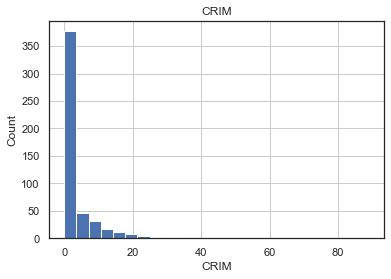

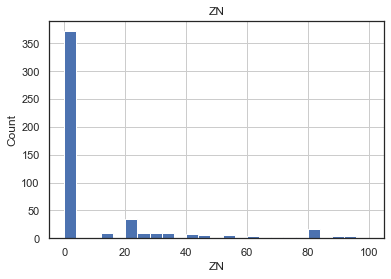

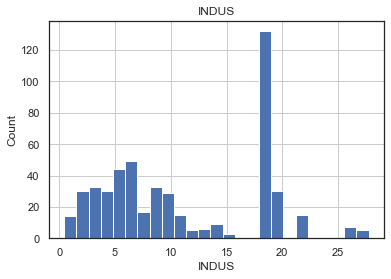

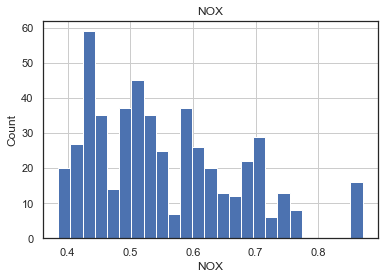

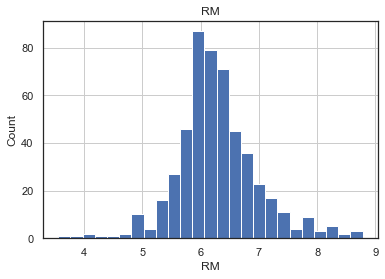

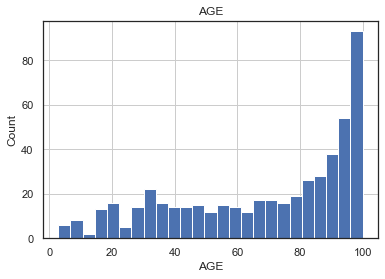

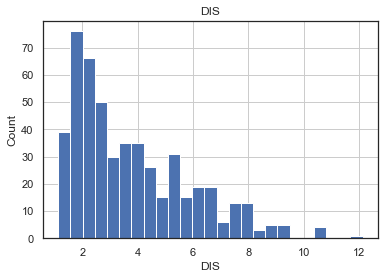

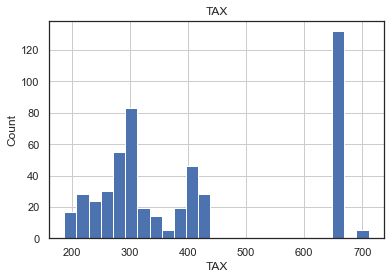

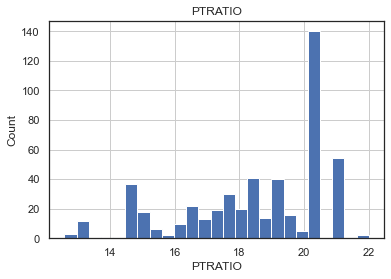

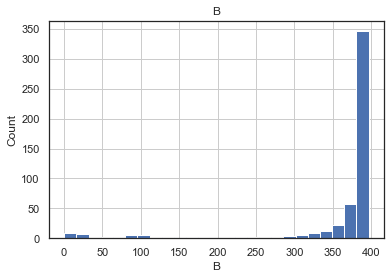

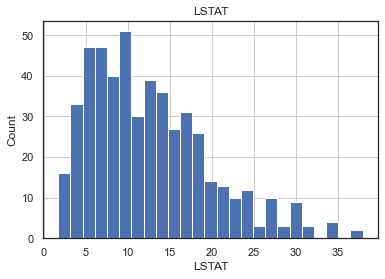

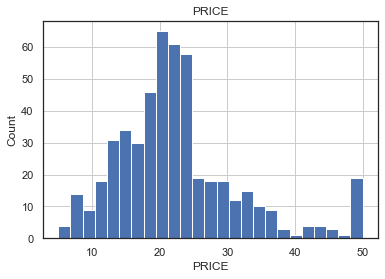

In [25]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()  # create a copy to not affect the real dataframe
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

* CRIM, ZN, INDUS, NOX, AGE, DIS, TAX, PTRATIO B, LSTAT are not normally distributed. Only RM feature follows the Normal Distribution

In [ ]:
df['ZN'].value_counts()

* ZN looks like it has many 0s (same as NAN) so we must replace it with some meaningful values.

* We will be using logarithmic transformation to transform data to normal distribution to have better understanding of relationship between independet and dependet feature


In [ ]:

for feature in continuous_feature:
    data=df.copy()
    if 0 in df[feature].unique():  # log0 is undefined
        pass
    else:
        data[feature]=np.log(data[feature])
        data['PRICE']=np.log(data['PRICE'])
        sns.regplot(x=feature, y="PRICE", data=data, ci=65)
        #plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('PRICE')
        plt.title(feature)
        plt.show()

### Outliers

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Variables

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features